In [1]:
#Candidate no.:277244

## EDA AND HYPOTHESIS TESTING ON MOVIE METADATA DATASET

This is Data analysis and hypothesis testing on movie_metadata dataset which describe regarding gross,budget,imdb scores and other factors of the movie require to analyze a profitable movie. I am planning to do data cleaning and wrangling of dataset first and explore some EDA on the dataset. Finally, I will perform some hypothesis testing on the data. To get the next profitable movie , I assume a budget limitation and imdb_score for analysis. 

In [1]:
#importing dataset csv file here using read_csv function

myfile='movie_metadata.csv'
#standard imports for when working with pandas
import numpy as np
#matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

myfile = 'movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)
df.head(5)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [2]:
df.info() #summary of dataframe, datatype,memoryusage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [3]:
df.describe() #descriptive statistic of dataframe

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [4]:
df.shape #data set dimension-Number of rows and columns

(5043, 28)

<Axes: >

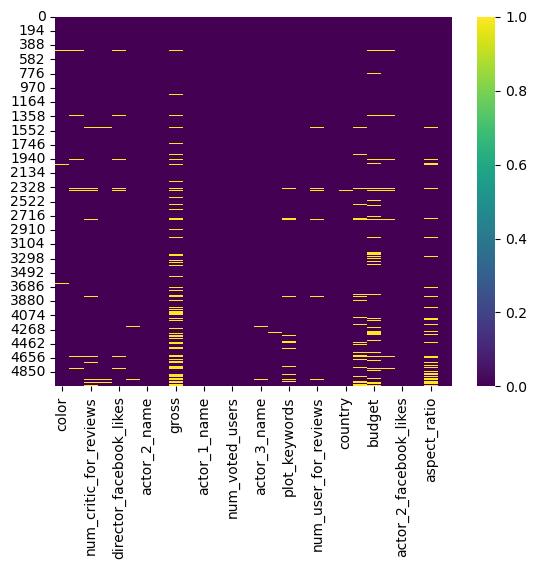

In [5]:
import seaborn as sn #importing seaborn module 
sn.heatmap(df.isnull(),cmap='viridis')
#df.isnull() returns df with all missing data as true.
#visualising missing values in df

## Data Cleaning and Wrangling

In [6]:
#data cleaning null values and duplicate values
df.dropna(how="any",inplace = True)
df.drop_duplicates(inplace= True)
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3722 non-null   object 
 1   director_name              3722 non-null   object 
 2   num_critic_for_reviews     3722 non-null   float64
 3   duration                   3722 non-null   float64
 4   director_facebook_likes    3722 non-null   float64
 5   actor_3_facebook_likes     3722 non-null   float64
 6   actor_2_name               3722 non-null   object 
 7   actor_1_facebook_likes     3722 non-null   float64
 8   gross                      3722 non-null   float64
 9   genres                     3722 non-null   object 
 10  actor_1_name               3722 non-null   object 
 11  movie_title                3722 non-null   object 
 12  num_voted_users            3722 non-null   int64  
 13  cast_total_facebook_likes  3722 non-null   int64

In [7]:
#removing some columns which I am not using here
df= df.drop(['color', 
                      'director_facebook_likes', 
                      'actor_3_facebook_likes', 
                      'actor_1_facebook_likes', 
                      'cast_total_facebook_likes', 
                      'actor_2_facebook_likes', 
                      'duration', 
                      'facenumber_in_poster', 
                      'content_rating',  
                      'movie_imdb_link', 
                      'aspect_ratio',
                      'plot_keywords',
                      'actor_2_name',
                      'actor_3_name'], 
                       axis = 1)
df


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,USA,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,USA,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,UK,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,USA,250000000.0,2012.0,8.5,164000
4,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,USA,263700000.0,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,Olivier Assayas,81.0,136007.0,Drama|Music|Romance,Maggie Cheung,Clean,3924,39.0,French,France,4500.0,2004.0,6.9,171
3718,Jafar Panahi,64.0,673780.0,Drama,Fereshteh Sadre Orafaiy,The Circle,4555,26.0,Persian,Iran,10000.0,2000.0,7.5,697
3719,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,USA,7000.0,2004.0,7.0,19000
3720,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,USA,7000.0,1992.0,6.9,0


In [8]:
df.shape #checking dimension after removing null and duplicate value

(3722, 14)

## EDA

array([[<Axes: title={'center': 'num_critic_for_reviews'}>,
        <Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'num_voted_users'}>],
       [<Axes: title={'center': 'num_user_for_reviews'}>,
        <Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'title_year'}>],
       [<Axes: title={'center': 'imdb_score'}>,
        <Axes: title={'center': 'movie_facebook_likes'}>, <Axes: >]],
      dtype=object)

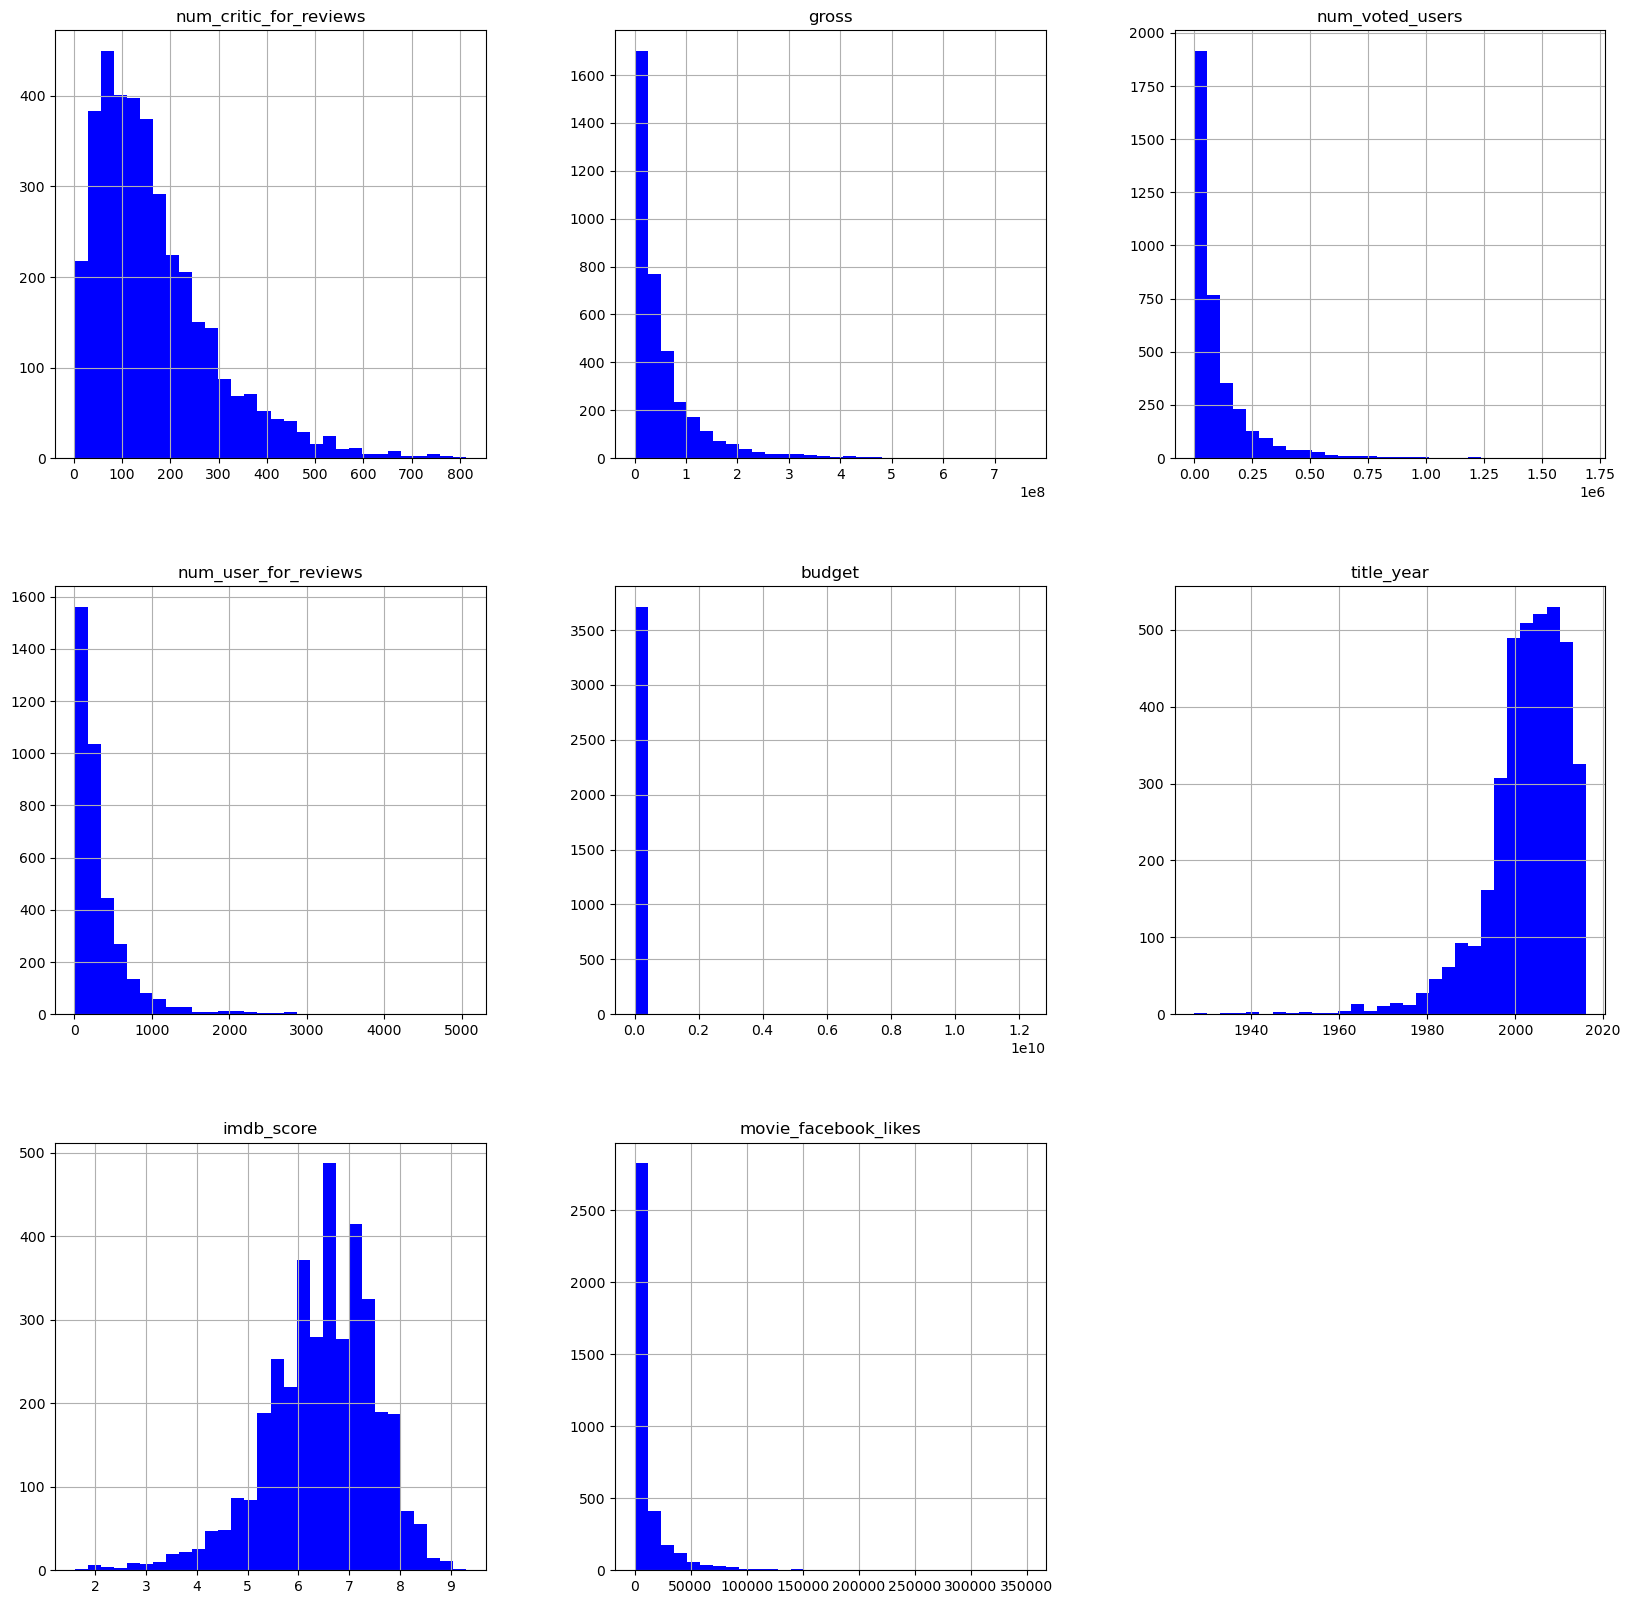

In [9]:
df.hist(bins=30,figsize=(20,20),color='b') #histograms of numerical columns of data

### Checking unique countries

In [10]:
df['country'].unique() #number of unique countries #eda

array(['USA', 'UK', 'New Zealand', 'Canada', 'Australia', 'Germany',
       'China', 'New Line', 'France', 'Japan', 'Spain', 'Hong Kong',
       'Czech Republic', 'Peru', 'South Korea', 'Aruba', 'Denmark',
       'Ireland', 'South Africa', 'Italy', 'Romania', 'Chile',
       'Netherlands', 'Hungary', 'Russia', 'Belgium', 'Greece', 'Taiwan',
       'Official site', 'Thailand', 'Iran', 'West Germany', 'Georgia',
       'India', 'Mexico', 'Brazil', 'Finland', 'Norway', 'Iceland',
       'Argentina', 'Colombia', 'Poland', 'Israel', 'Indonesia',
       'Afghanistan'], dtype=object)

### checking unique language and number of english movies

In [11]:
df['language'].unique() #number of unique languages

array(['English', 'Mandarin', 'Aboriginal', 'Spanish', 'French',
       'Filipino', 'Maya', 'Kazakh', 'Cantonese', 'Japanese', 'Aramaic',
       'Italian', 'Dutch', 'Dari', 'German', 'Mongolian', 'Thai',
       'Bosnian', 'Korean', 'Hungarian', 'Hindi', 'Danish', 'Portuguese',
       'Norwegian', 'Czech', 'Russian', 'Zulu', 'Hebrew', 'Arabic',
       'Vietnamese', 'Indonesian', 'Romanian', 'Persian'], dtype=object)

In [12]:
len(df[df['language']=='English'])#number of movies whose language is english

3566

In [13]:
x=df.genres.unique() #unique genres
x

array(['Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Fantasy',
       'Action|Adventure|Thriller', 'Action|Thriller',
       'Action|Adventure|Sci-Fi', 'Action|Adventure|Romance',
       'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance',
       'Adventure|Family|Fantasy|Mystery', 'Action|Adventure',
       'Action|Adventure|Western', 'Action|Adventure|Family|Fantasy',
       'Action|Adventure|Comedy|Family|Fantasy|Sci-Fi',
       'Adventure|Fantasy', 'Action|Adventure|Drama|History',
       'Adventure|Family|Fantasy', 'Action|Adventure|Drama|Romance',
       'Drama|Romance', 'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Fantasy|Romance',
       'Action|Adventure|Fantasy|Sci-Fi|Thriller',
       'Adventure|Animation|Comedy|Family|Fantasy',
       'Adventure|Animation|Comedy|Family|Sport', 'Action|Crime|Thriller',
       'Action|Adventure|Horror|Sci-Fi|Thriller',
       'Adventure|Animation|Family|Sci-Fi',
       'Action|Comedy|Crime|Thriller', 'Animation|

In [14]:
print(len(x))

745


### checking if there is any negative gross and budget 

In [15]:
print(len(df[df['budget']<=0])) #checking if budget and gross less than 0
print(len(df[df['gross']<=0]))

0
0


### creating new coloumn for profit and checking if there is any negative profit

In [16]:
df['profit'] =df['gross'] - df['budget'] #creating new column for profit
df.head(5)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,USA,237000000.0,2009.0,7.9,33000,523505847.0
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,USA,300000000.0,2007.0,7.1,0,9404152.0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,UK,245000000.0,2015.0,6.8,85000,-44925825.0
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,USA,250000000.0,2012.0,8.5,164000,198130642.0
4,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,USA,263700000.0,2012.0,6.6,24000,-190641321.0


### correlation matrix

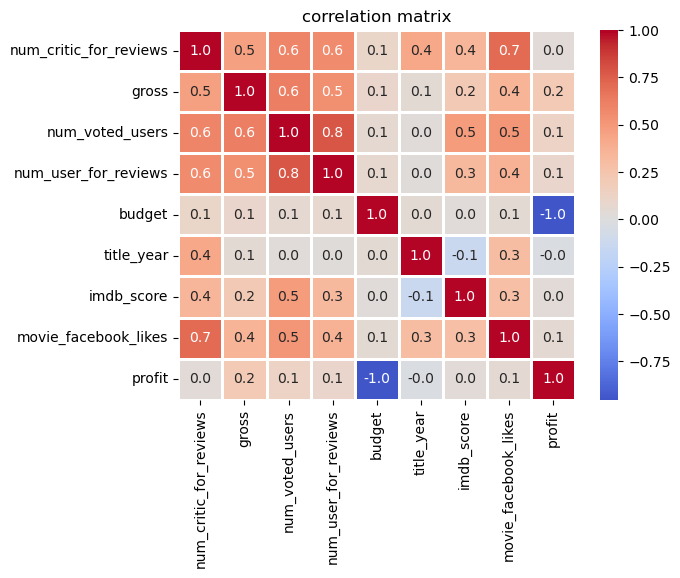

<Figure size 3000x2000 with 0 Axes>

In [17]:
df1=df.select_dtypes('number')
cor=df1.corr()
plt.title("correlation matrix")
sn.heatmap(cor,linewidths=1,center=0,annot=True,cmap='coolwarm',fmt=".1f")
plt.figure(figsize=(30,20))
plt.show()

#This numeric chart reveals how pairwise columns in the data are correlated. 
#The diagonal line shows perfect correlation - each variable matched with itself, thus all are 1 in red. 
#Look elsewhere on the diagram, and you'll notice lighter colors and smaller value tell us there's less correlation between those variables. 
#For example, num_voted_user and num_user_for_review has a positive correlation of 0.8.
#Again if you see the relation between budget and profit it is -1.0 showing perfect negative correlation.

In [18]:
x=df[df['profit']<=0] #number of movies whose profit less than zero 
df_lessprofit=len(x)
df_lessprofit

1723

Here I am trying find out number of movies whose profit<=0. 

In [19]:
x[['genres','profit','budget','gross','imdb_score']].head(10) #genres whose profit is less than 0 

,genres,profit,budget,gross,imdb_score
2,Action|Adventure|Thriller,-44925825.0,245000000.0,200074175.0,6.8
4,Action|Adventure|Sci-Fi,-190641321.0,263700000.0,73058679.0,6.6
6,Adventure|Animation|Comedy|Family|Fantasy|Musi...,-59192738.0,260000000.0,200807262.0,7.8
10,Action|Adventure|Sci-Fi,-8930592.0,209000000.0,200069408.0,6.1
11,Action|Adventure,-31631573.0,200000000.0,168368427.0,6.7
13,Action|Adventure|Western,-125710090.0,215000000.0,89289910.0,6.5
15,Action|Adventure|Family|Fantasy,-83385977.0,225000000.0,141614023.0,6.6
17,Action|Adventure|Fantasy,-8936125.0,250000000.0,241063875.0,6.7
18,Action|Adventure|Comedy|Family|Fantasy|Sci-Fi,-45979146.0,225000000.0,179020854.0,6.8
21,Action|Adventure|Drama|History,-94780265.0,200000000.0,105219735.0,6.7


### scatter plot for budget,gross, profit

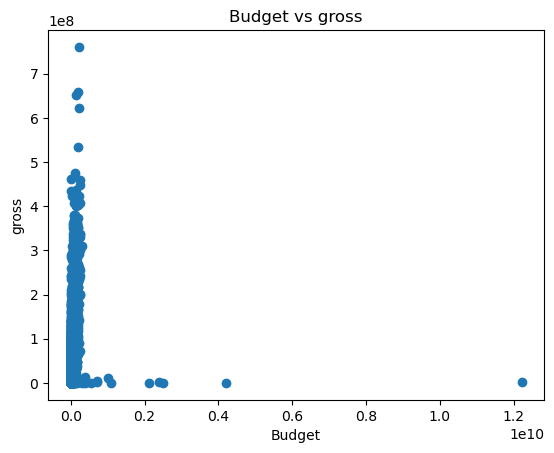

In [20]:
plt.scatter(df['budget'],df['gross'])
plt.xlabel('Budget')
plt.ylabel('gross')
plt.title("Budget vs gross")
plt.show()

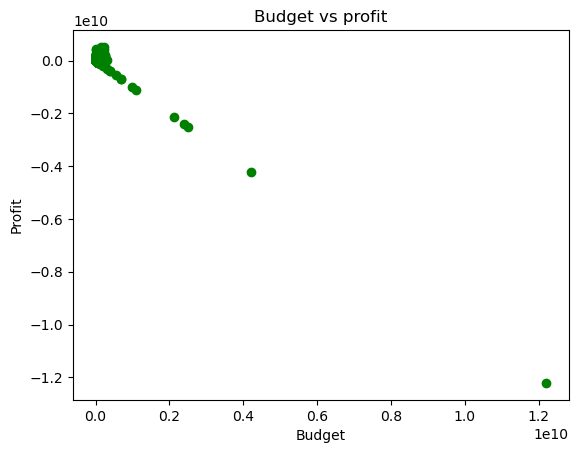

In [21]:
plt.scatter(df['budget'],df['profit'],c='green')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title("Budget vs profit")
plt.show()
#scatter plot between budget and profit

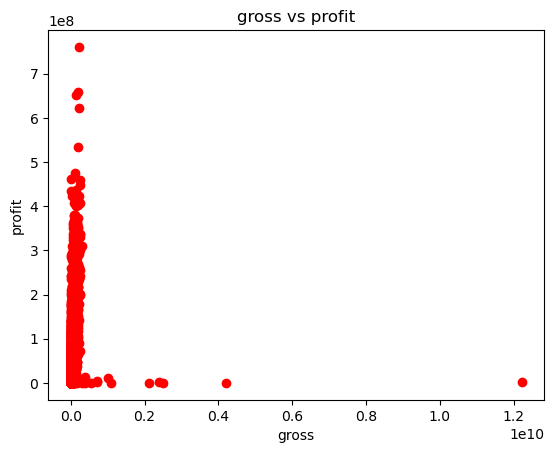

In [22]:
plt.scatter(df['budget'],df['gross'],c='red')
plt.title("gross vs profit")
plt.xlabel('gross')
plt.ylabel('profit')
plt.show()
#scatter plot between gross and profit

**Description of all the three scatter plot**
1. independent relation between gross and budget
2. budget increase but profit decrease
3. positive relation between gross and profit There are some points in the ends of the graph , deattached from the group of points which is called outliers

### number of movies per year with graph

In [23]:
movies_per_year=df['title_year'].value_counts().sort_values(ascending=False)
movies_per_year.head(10)
#number of movies per year

title_year
2006.0    188
2002.0    186
2008.0    182
2005.0    182
2009.0    181
2004.0    178
2001.0    176
2010.0    167
2011.0    167
2013.0    162
Name: count, dtype: int64

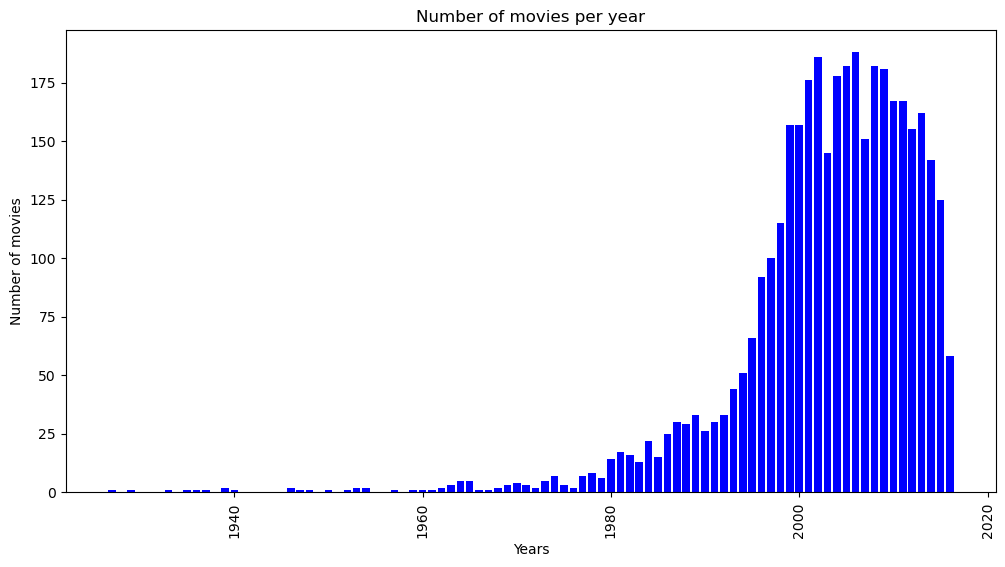

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(movies_per_year.index, movies_per_year.values, color='blue')
plt.title("Number of movies per year")
plt.xlabel('Years')
plt.ylabel('Number of movies')
plt.xticks(rotation=90)
plt.show()
#barplot to show number of movies per year-many number of movies made after year 2000. 
##It looks like after 1980 , there are more number of movies release with greatest number at 2006

In [25]:
topyears=movies_per_year.nlargest(1)
topyears
#highest number of movies  in 2006

title_year
2006.0    188
Name: count, dtype: int64

### average imdb_score per year and finding maximum average score in which year

In [26]:
imdb_avg=df.groupby('title_year')['imdb_score'].mean() #average imdb score per year
#grouping the imdb scores based on title year and finding average of the imdb scores each year.
imdb_avg

title_year
1927.0    8.300000
1929.0    6.300000
1933.0    7.700000
1935.0    7.800000
1936.0    8.600000
            ...   
2012.0    6.478065
2013.0    6.551235
2014.0    6.464085
2015.0    6.478400
2016.0    6.472414
Name: imdb_score, Length: 74, dtype: float64

In [27]:
max_year = imdb_avg.idxmax()
max_score = imdb_avg.max()
print(f"{max_year}:{max_score}")
#max average score on that year

1966.0:8.9


### Average profit vs Title Year

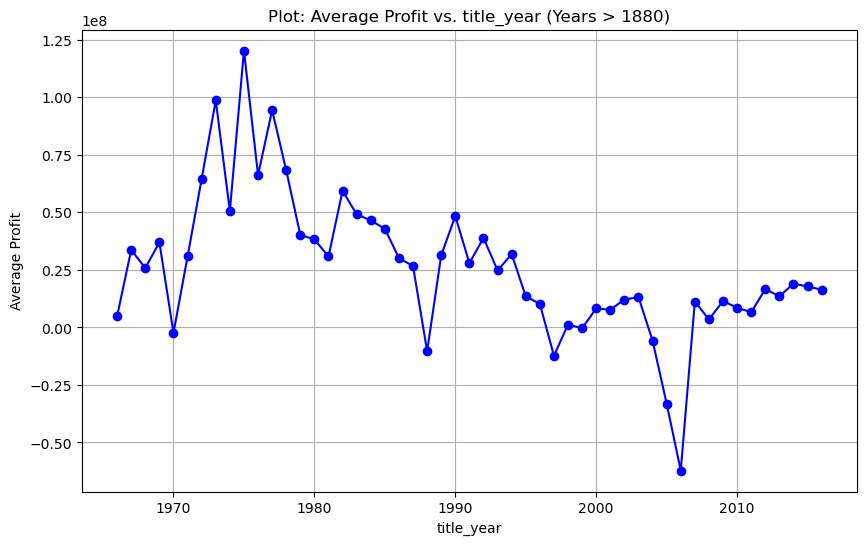

In [28]:
filtered = df[df['title_year'] > 1965]

avg_profit_by_year = filtered.groupby('title_year')['profit'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_profit_by_year['title_year'], avg_profit_by_year['profit'], color='blue', marker='o')
plt.title('Plot: Average Profit vs. title_year (Years > 1880)')
plt.xlabel('title_year')
plt.ylabel('Average Profit')
plt.grid(True)
plt.show()
#there is increase in average profit before 1970 and a decrease in profit just after 2000

### counting number of genres

In [29]:
genre_count = df['genres'].value_counts()

x=genre_count.head(10)
x

genres
Comedy|Drama|Romance           147
Drama                          140
Comedy|Drama                   137
Comedy                         137
Comedy|Romance                 131
Drama|Romance                  114
Crime|Drama|Thriller            81
Action|Crime|Thriller           55
Action|Crime|Drama|Thriller     50
Action|Adventure|Sci-Fi         46
Name: count, dtype: int64

### budget vs genres

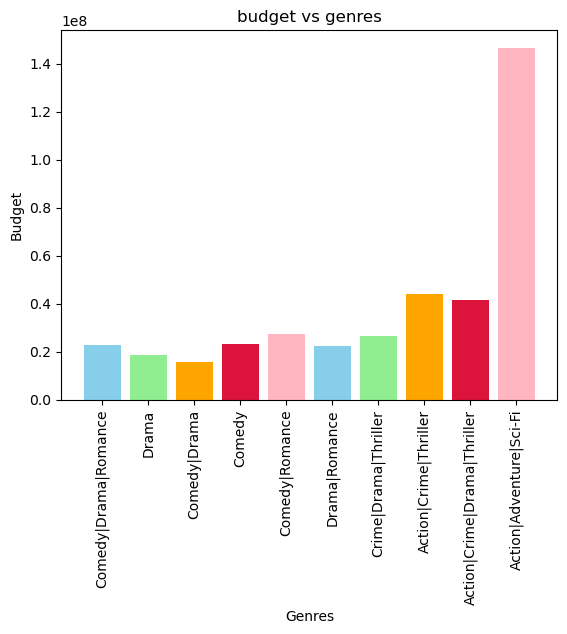

In [30]:
colors = ['skyblue', 'lightgreen', 'orange', 'crimson', 'lightpink']
topgenre=df.groupby('genres')[['budget','imdb_score','gross','profit']].mean()
df1=pd.DataFrame(topgenre['budget'],x.index)
df1

plt.bar(df1.index,df1['budget'],color=colors)
plt.title("budget vs genres")
plt.xticks(rotation = 90)
plt.xlabel('Genres')
plt.ylabel('Budget')

plt.show()

### Finding top 10 genres with highest profit within a budget

I assume a max budget as 1500000.I will check all the details for this budget limit only.

In [31]:
max_budget_2 = 1500000
df_budget= df[df['budget'] <= max_budget_2]
x=df_budget['genres'].value_counts().sort_values(ascending=False).head(15)
#extracting the details of those genres whose budget<=1500000

In [32]:
df_budget.head(5) #top 5 rows for budget<=1500000

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes,profit
1201,Martin Scorsese,112.0,32645.0,Crime|Drama|Romance|Thriller,Robert De Niro,Mean Streets,67797,223.0,English,USA,500000.0,1973.0,7.4,0,-467355.0
2051,Alfred Hitchcock,290.0,32000000.0,Horror|Mystery|Thriller,Janet Leigh,Psycho,422432,1040.0,English,USA,806947.0,1960.0,8.5,18000,31193053.0
2196,John Carpenter,212.0,21378000.0,Fantasy|Horror,Jamie Lee Curtis,The Fog,46492,335.0,English,USA,1000000.0,1980.0,6.8,7000,20378000.0
2251,John Carpenter,318.0,47000000.0,Horror|Thriller,Jamie Lee Curtis,Halloween,157857,1191.0,English,USA,300000.0,1978.0,7.9,12000,46700000.0
2866,Tobe Hooper,277.0,30859000.0,Horror|Thriller,Gunnar Hansen,The Texas Chain Saw Massacre,96410,826.0,English,USA,83532.0,1974.0,7.5,0,30775468.0


In [33]:
#top 10 genres with highest profit with budget <=1500000
average_profit_by_genre = df_budget.groupby('genres')[['gross','budget','imdb_score','profit']].mean()
df_test=average_profit_by_genre.reset_index()
df_profit=df_test.sort_values(by='profit',ascending=False).head(100)
df_profit.head(10)

,genres,gross,budget,imdb_score,profit
38,Comedy|Drama|Music,62000000.00,8.385000e+05,6.850000,6.116150e+07
85,Fantasy|Horror|Mystery|Thriller,53991137.00,1.500000e+06,6.800000,5.249114e+07
86,Horror,45711857.00,5.892857e+05,6.042857,4.512257e+07
15,Adventure|Family|Romance,39552600.00,5.000000e+05,6.100000,3.905260e+07
91,Horror|Thriller,35695163.80,1.734128e+05,7.000000,3.552175e+07
89,Horror|Mystery|Thriller,34447680.75,1.064237e+06,7.000000,3.338344e+07
11,Adventure|Biography|Drama|Horror|Thriller,30500882.00,5.000000e+05,5.700000,3.000088e+07
82,Drama|Sport,26057639.60,5.920000e+05,6.700000,2.546564e+07
32,Comedy|Crime|Mystery,18488314.00,1.200000e+06,7.100000,1.728831e+07
88,Horror|Mystery|Sci-Fi|Thriller,18112929.00,1.000000e+06,5.000000,1.711293e+07


#### Profit Vs genre

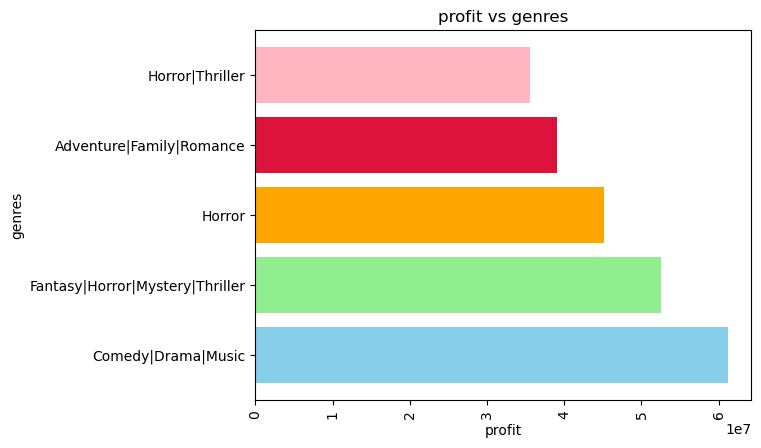

In [34]:
colors = ['skyblue', 'lightgreen', 'orange', 'crimson', 'lightpink']
plt.barh(df_profit['genres'][:5] , df_profit['profit'][:5],color=colors) # To show the profit of top 5 genres within the budget limit
plt.xticks(rotation = 90)
plt.title("profit vs genres")
plt.xlabel('profit')
plt.ylabel('genres')
plt.show()
#maximum profit in Comedy|Drama|Music Considering max budget is 1500000

#### budget vs genres

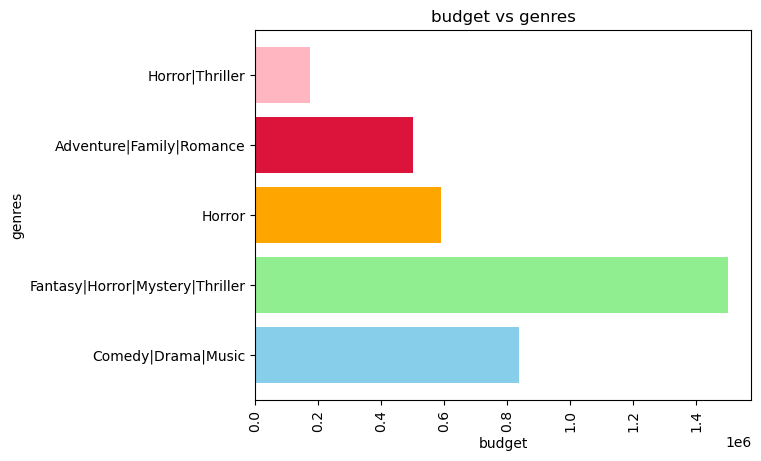

In [35]:
plt.barh(df_profit['genres'][:5] , df_profit['budget'][:5],color=colors)  
plt.xticks(rotation = 90)
plt.title("budget vs genres")
plt.xlabel('budget')
plt.ylabel('genres')
plt.show()
##Fantasy|Horror|Mystery|Thriller has high budget

In [36]:
df_budget[df_budget['genres']=='Comedy|Drama|Music']

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes,profit
3544,Russ Meyer,101.0,9000000.0,Comedy|Drama|Music,Charles Napier,Beyond the Valley of the Dolls,7584,137.0,English,USA,900000.0,1970.0,6.2,0,8100000.0
3596,George Lucas,100.0,115000000.0,Comedy|Drama|Music,Harrison Ford,American Graffiti,63839,238.0,English,USA,777000.0,1973.0,7.5,0,114223000.0


In [37]:
df_budget[df_budget['genres']=='Fantasy|Horror|Mystery|Thriller']

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes,profit
3486,James Wan,445.0,53991137.0,Fantasy|Horror|Mystery|Thriller,Lin Shaye,Insidious,202800,752.0,English,USA,1500000.0,2010.0,6.8,60000,52491137.0


## Finding the genres with minimum IMdb 8
I will see the profit and budget of those movies whose imdb_score is greater than 8

In [38]:
min_imdb_score_2=8.0
df_imdb=df[df['imdb_score']>=min_imdb_score_2]
df_imdb['genres'].value_counts().sort_values(ascending=False).head(10)
#extracting the count of genres with imdb_score>=8

genres
Drama                                        17
Crime|Drama                                   9
Crime|Drama|Mystery|Thriller                  6
Action|Adventure|Sci-Fi                       5
Biography|Drama                               4
Drama|Mystery|Thriller                        4
Drama|Romance                                 4
Action|Adventure|Sci-Fi|Thriller              3
Biography|Crime|Drama                         3
Adventure|Animation|Comedy|Family|Fantasy     3
Name: count, dtype: int64

17 Drama genres has imdb rating >=8

In [39]:
average_profit_by_genre_1 = df_imdb.groupby('genres')[['gross','budget','imdb_score','profit']].mean()
df_test1=average_profit_by_genre_1.reset_index()
df_imdb1=df_test1.sort_values(by='imdb_score',ascending=False)
df_imdb1.head(5)
#western genres has high imdb_score

,genres,gross,budget,imdb_score,profit
120,Western,6.100000e+06,1.200000e+06,8.900000,4.900000e+06
6,Action|Adventure|Drama|Fantasy,3.437786e+08,9.366667e+07,8.800000,2.501119e+08
80,Crime|Drama,4.412952e+07,1.697778e+07,8.711111,2.715174e+07
5,Action|Adventure|Drama,2.690610e+05,2.000000e+06,8.700000,-1.730939e+06
8,Action|Adventure|Fantasy|Sci-Fi,3.534066e+08,2.050000e+07,8.633333,3.329066e+08


In [40]:
df_imdb[df_imdb['genres']=='Action|Adventure|Drama|Fantasy']


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes,profit
256,Peter Jackson,297.0,313837577.0,Action|Adventure|Drama|Fantasy,Christopher Lee,The Lord of the Rings: The Fellowship of the R...,1238746,5060.0,English,New Zealand,93000000.0,2001.0,8.8,21000,220837577.0
323,Peter Jackson,328.0,377019252.0,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,3189.0,English,USA,94000000.0,2003.0,8.9,16000,283019252.0
324,Peter Jackson,294.0,340478898.0,Action|Adventure|Drama|Fantasy,Christopher Lee,The Lord of the Rings: The Two Towers,1100446,2417.0,English,USA,94000000.0,2002.0,8.7,10000,246478898.0


In [41]:
df_imdb[df_imdb['genres']=='Western']

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,country,budget,title_year,imdb_score,movie_facebook_likes,profit
3522,Sergio Leone,181.0,6100000.0,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780.0,Italian,Italy,1200000.0,1966.0,8.9,20000,4900000.0


#### imdb_Score vs genres

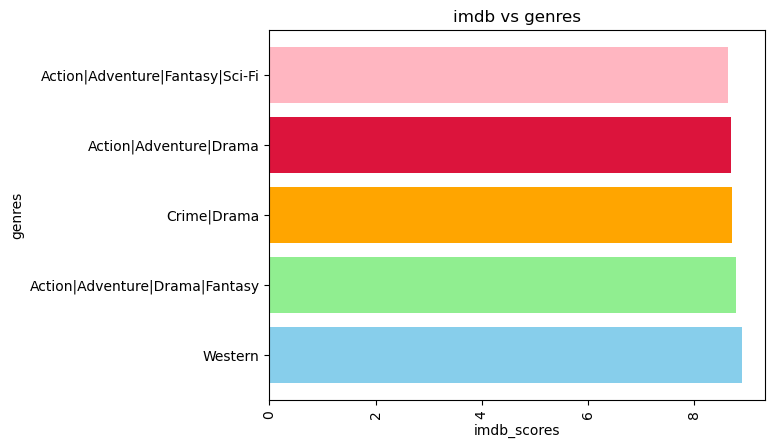

In [42]:
colors = ['skyblue', 'lightgreen', 'orange', 'crimson', 'lightpink']
plt.barh(df_imdb1['genres'][:5] , df_imdb1['imdb_score'][:5],color=colors) # To show the profit of top 5 genres within the budget limit
plt.xticks(rotation = 90)
plt.title("imdb vs genres")
plt.xlabel('imdb_scores')
plt.ylabel('genres')
plt.show()
#highest avg imdb score is in western

#### profit vs genres

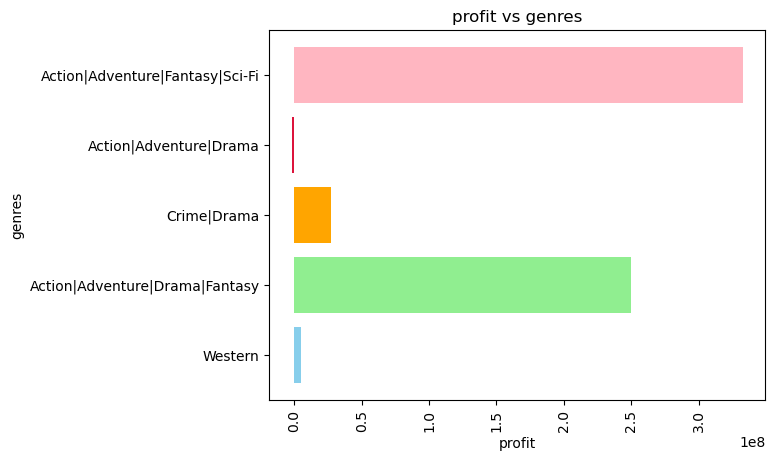

In [43]:
colors = ['skyblue', 'lightgreen', 'orange', 'crimson', 'lightpink']
plt.barh(df_imdb1['genres'][:5] , df_imdb1['profit'][:5],color=colors) # To show the profit of top 5 genres within the budget limit
plt.xticks(rotation = 90)
plt.title("profit vs genres")
plt.xlabel('profit')
plt.ylabel('genres')
plt.show()
#Action|Adventure|Fantasy|sci-fi are those movies whose imdb score is >=8 and profit is also high

## Finding those movies whose budget is <=1500000 and imdb_score>=8

In [44]:
y_mixed=df[(df.imdb_score >8) & (df.budget <=1500000)].head(5)

y_mixed['genres'].value_counts().sort_values(ascending=False).head(10)

genres
Horror|Mystery|Thriller    1
Comedy|Drama|Family        1
Comedy|Crime               1
Drama                      1
Crime|Drama|Thriller       1
Name: count, dtype: int64

In [45]:
z=y_mixed.groupby('genres')[['gross','budget','imdb_score','profit','title_year']].mean()
df_test2=z.reset_index()
df_imdb2=df_test2.sort_values(by='profit',ascending=False).head(10)
df_imdb2

,genres,gross,budget,imdb_score,profit,title_year
4,Horror|Mystery|Thriller,32000000.0,806947.0,8.5,31193053.0,1960.0
0,Comedy|Crime,3650677.0,960000.0,8.2,2690677.0,1998.0
2,Crime|Drama|Thriller,2812029.0,1200000.0,8.4,1612029.0,1992.0
3,Drama,1647780.0,1300000.0,8.1,347780.0,1998.0
1,Comedy|Drama|Family,163245.0,1500000.0,8.6,-1336755.0,1936.0


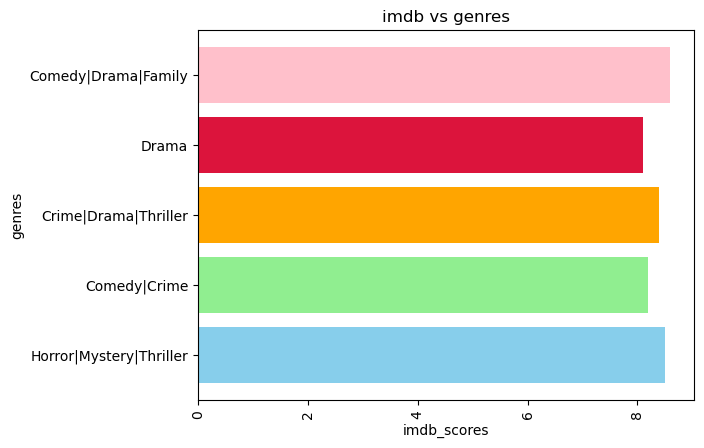

In [46]:
colors = ['skyblue', 'lightgreen', 'orange', 'crimson','pink']
plt.barh(df_imdb2['genres'][:5] , df_imdb2['imdb_score'][:5],color=colors)
plt.xticks(rotation = 90)
plt.title("imdb vs genres")
plt.xlabel('imdb_scores')
plt.ylabel('genres')
plt.show()
#Comedy|Drama|Family has high imdb score and within budget but the profit is less
#here I applied two condition -one for budget and another for imdb score. I filtered out those data and check that action|thriller has higher imdb scores.

Comedy|Drama|Family has high imdb_score and within budget but the profit is less

Horror|Mystery|Thriller has high imdb_score and within budget with profit is also good

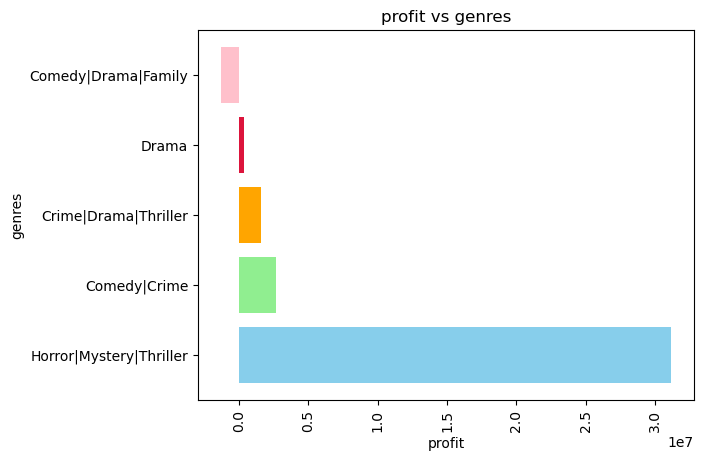

In [47]:
colors = ['skyblue', 'lightgreen', 'orange', 'crimson','pink']
plt.barh(df_imdb2['genres'][:5] , df_imdb2['profit'][:5],color=colors)
plt.xticks(rotation = 90)
plt.title("profit vs genres")
plt.xlabel('profit')
plt.ylabel('genres')
plt.show()
#I filtered out those data and check that Horror|Mystery|Thriller has higher profit.

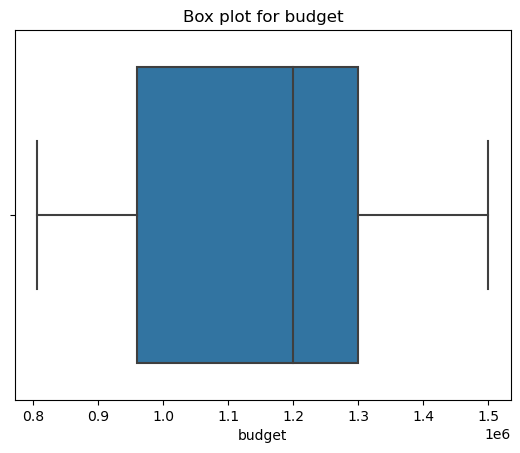

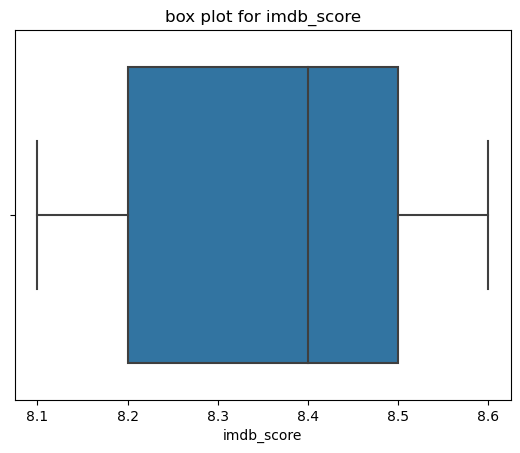

In [48]:
sn.boxplot(x='budget',data=df_imdb2)
plt.title("Box plot for budget")
plt.show()

sn.boxplot(x='imdb_score',data=df_imdb2)
plt.title("box plot for imdb_score")
plt.show()
#box plot for budget and imdb_score

upper outlier for profit-                    genres       gross    budget  imdb_score      profit  \
4  Horror|Mystery|Thriller  32000000.0  806947.0         8.5  31193053.0   

   title_year  
4      1960.0  


Lower outlier for prfit -Empty DataFrame
Columns: [genres, gross, budget, imdb_score, profit, title_year]
Index: []


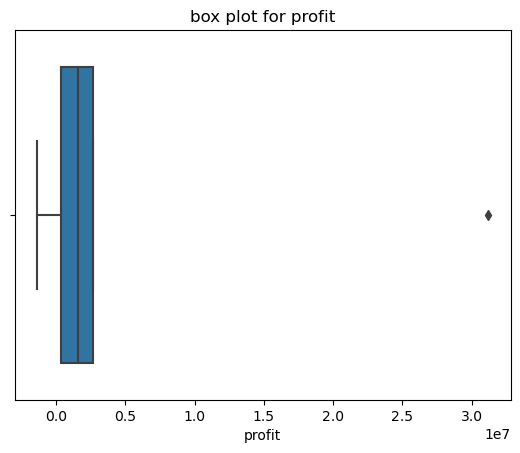

In [49]:
Q1=df_imdb2['profit'].quantile(0.25)
Q3=df_imdb2['profit'].quantile(0.75)
IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
#outliers=df_imdb2[(df_imdb2['profit']<lb) | (df_imdb2['profit']>ub)]
lo=df_imdb2[df_imdb2['profit']<lb]
uo = df_imdb2[df_imdb2['profit'] > ub]
print(f"upper outlier for profit-{uo}")
print("\n")
print(f"Lower outlier for prfit -{lo}")
#we consider the df_imdb2 dataframe here where we are applyting both budget and imdb_score condition
#no outlier are present for budget and imdb_score (boxplot figure)
#There is upper outlier for profit
sn.boxplot(x='profit',data=df_imdb2)
plt.title("box plot for profit")
plt.show()

## HYPOTHESIS TESTING

I assume three cases in the hypothesis testing to analyse the most profitable movie.

Here I  am conducting ttest to compare the mean profit of one genre movies and profit of other genre movies

## CASE 1
if Comedy|Drama|Music  movies get higher profit,then average profit will be greater for Comedy|Drama|Music  movies.

**H0**: Average profit of Comedy|Drama|Music movies is same as average of other genres movies M1-M2=0

**H1**: Average profit of Comedy|Drama|Music movies is greater than average profit of other genres movies M1-M2>0

 As it has different sample size I am using ttest here. In Case 1 equal_var is False as I am assuming that the variances of the two groups being compared are not equal.

I am finding the mean of the profit for genres Comedy|Drama|Music and another mean for other genres also. After conducting the test, I can see that it Reject the Null Hypothesis H0 at 30.0 % significance level.There is evidence of a significant difference in average profit between Comedy|Drama|Music and other movies.

From the above hypothesis testing, I can say that making a movie in Comedy|Drama|Music genre can give higher profit than average of other movie genre at a confidence interval of 70%.

I also created the distribution graph for better understanding.

In [50]:
#case1 
# part 1
df_1 = df_budget[df_budget['genres'] != 'Comedy|Drama|Music'] #df_1 refer to movies from genres other than Comedy|Drama|Music
df_2 = df_budget[df_budget['genres'] =='Comedy|Drama|Music'] #df_2 refer to movies from Comedy|Drama|Music
print('The mean profit for all genres  movies other than Comedy|Drama|Music = {}'.format(np.mean(df_1['profit'])))
print('The mean profit of Comedy|Drama|Music movies = {}'.format(np.mean(df_2['profit'])))

The mean profit for all genres  movies other than Comedy|Drama|Music = 6229138.153153153
The mean profit of Comedy|Drama|Music movies = 61161500.0


In [51]:
#part 2
alpha = [0.01, 0.05, 0.1,0.2,0.3] #common values for significance level
from scipy.stats import ttest_ind
t_stat,p_value = ttest_ind(df_1['profit'],df_2['profit'], equal_var= False) 
#equal_var is variance of two sample not assumed to be equal
print(f"p_value={p_value}")
for i in alpha:
    if (p_value/2) < i:
        print('Reject the Null Hypothesis H0 at {} % significance level.There is evidence of a significant difference in average profit between Comedy|Drama|Music and other movies.'.format(i*100))
    else:
        print('Failed to reject the Null Hypothesis H0 at {} % significance level.There is not enough evidence to suggest a significant difference in average profit between Comedy|Drama|Music and other movies.'.format(i*100))

        print("\n")

p_value=0.48891919070218043
Failed to reject the Null Hypothesis H0 at 1.0 % significance level.There is not enough evidence to suggest a significant difference in average profit between Comedy|Drama|Music and other movies.


Failed to reject the Null Hypothesis H0 at 5.0 % significance level.There is not enough evidence to suggest a significant difference in average profit between Comedy|Drama|Music and other movies.


Failed to reject the Null Hypothesis H0 at 10.0 % significance level.There is not enough evidence to suggest a significant difference in average profit between Comedy|Drama|Music and other movies.


Failed to reject the Null Hypothesis H0 at 20.0 % significance level.There is not enough evidence to suggest a significant difference in average profit between Comedy|Drama|Music and other movies.


Reject the Null Hypothesis H0 at 30.0 % significance level.There is evidence of a significant difference in average profit between Comedy|Drama|Music and other movies.


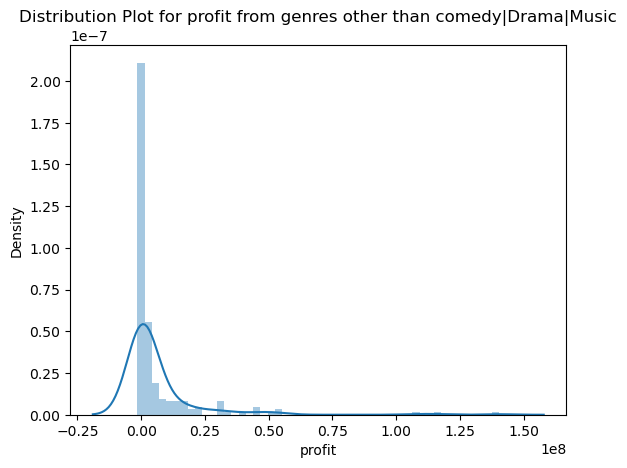

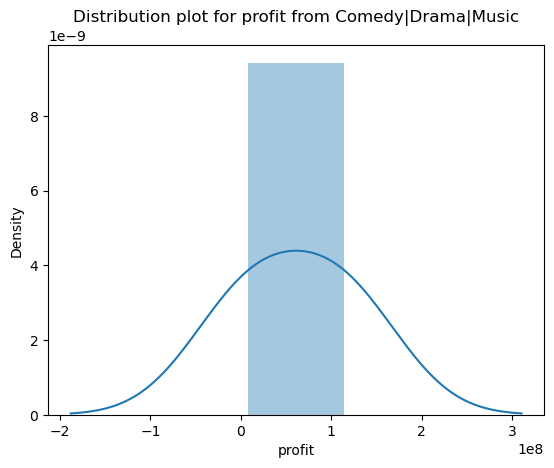

In [52]:
#part 3
import warnings
warnings.filterwarnings("ignore") 
sn.distplot(df_1['profit']) 
plt.title("Distribution Plot for profit from genres other than comedy|Drama|Music")
plt.show()
sn.distplot(df_2['profit'])
plt.title("Distribution plot for profit from Comedy|Drama|Music")
plt.show()

## Case 2

if Crime|Drama movies get higher profit,then average profit will be greater for Crime|Drama movies.

**H0**: Average profit of Crime|Drama movies is same as average of other genres movies M1-M2=0

**H1**: Average profit of Crime|Drama movies is greater than average profit of other genres movies M1-M2>0

 As it has different sample size I am using ttest here. In Case 1 equal_var is False as I am assuming that the variances of the two groups being compared are not equal.

I can see that it Reject the Null Hypothesis H0 at 1.0 % significance level.There is evidence of a significant difference in average profit between Crime|Drama and other movies.
From the above hypothesis testing, I can say that making a movie in Crime|Drama genre can give higher profit than average of other movie genre at a confidence interval of 99%.

In [53]:
# part 1-case 2
df_3 = df_budget[df_budget['genres'] != 'Crime|Drama'] 
df_4 = df_budget[df_budget['genres'] =='Crime|Drama'] 
print('The mean profit for all genres  movies other than Crime|Drama = {}'.format(np.mean(df_3['profit'])))
print('The mean profit of Crime|Drama movies = {}'.format(np.mean(df_4['profit'])))

The mean profit for all genres  movies other than Crime|Drama = 6858661.3926940635
The mean profit of Crime|Drama movies = 628965.0


In [54]:
#part 2
alpha = [0.01, 0.05, 0.1,0.2,0.3] #common values for significance level
from scipy.stats import ttest_ind
t_stat,p_value = ttest_ind(df_3['profit'],df_4['profit'], equal_var= False) 
#equal_var is variance of two sample not assumed to be equal
print(f"p_value={p_value}")
for i in alpha:
    if (p_value/2) < i:
        
        print('Reject the Null Hypothesis H0 at {} % significance level.There is evidence of a significant difference in average profit between Crime|Drama and other movies.'.format(i*100))
        print("\n")
    else:
        print('Failed to reject the Null Hypothesis H0 at {} % significance level.There is not enough evidence to suggest a significant difference in average profit between Crime|Drama and other movies.'.format(i*100))

        print("\n")

p_value=2.3483521423801138e-05
Reject the Null Hypothesis H0 at 1.0 % significance level.There is evidence of a significant difference in average profit between Crime|Drama and other movies.


Reject the Null Hypothesis H0 at 5.0 % significance level.There is evidence of a significant difference in average profit between Crime|Drama and other movies.


Reject the Null Hypothesis H0 at 10.0 % significance level.There is evidence of a significant difference in average profit between Crime|Drama and other movies.


Reject the Null Hypothesis H0 at 20.0 % significance level.There is evidence of a significant difference in average profit between Crime|Drama and other movies.


Reject the Null Hypothesis H0 at 30.0 % significance level.There is evidence of a significant difference in average profit between Crime|Drama and other movies.




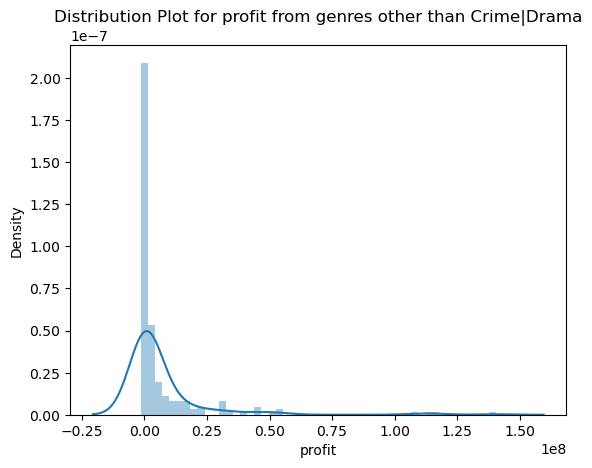

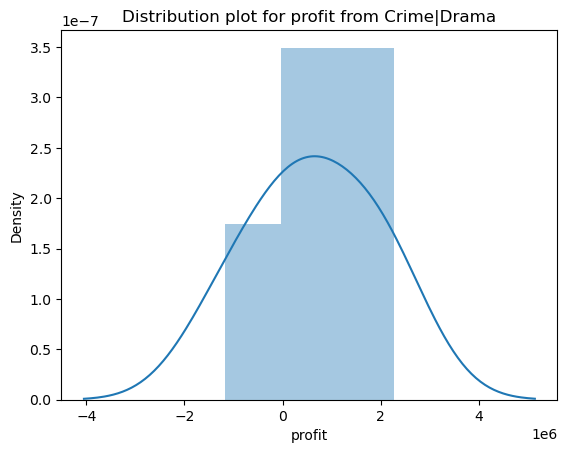

In [55]:
#part 3
import warnings
warnings.filterwarnings("ignore") 
sn.distplot(df_3['profit']) 
plt.title("Distribution Plot for profit from genres other than Crime|Drama")
plt.show()
sn.distplot(df_4['profit'])
plt.title("Distribution plot for profit from Crime|Drama")
plt.show()

## CASE 3

if Horror|Mystery|Thriller movies get higher profit,then average profit will be greater for Horror|Mystery|Thriller movies.

**H0**: Average profit of Horror|Mystery|Thriller movies is same as average of other genres movies M1-M2=0

**H1**: Average profit of Horror|Mystery|Thriller movies is greater than average profit of other genres movies M1-M2>0

As it has different sample size I am using ttest here. In Case 1 equal_var is True as I am assuming that the variances of the two groups being compared are equal.

I can see that it Reject the Null Hypothesis H0 at 1.0 % significance level.There is evidence of a significant difference in average profit between Horror|Mystery|Thriller and other movies.
From the above hypothesis testing, I can say that making a movie in Horror|Mystery|Thriller genre can give higher profit than average of other movie genre at a confidence interval of 99%.

In [56]:
# part 1-case 3
df_5 = df_imdb2[df_imdb2['genres'] != 'Horror|Mystery|Thriller'] 
df_6 = df_imdb2[df_imdb2['genres'] =='Horror|Mystery|Thriller'] 
print('The mean profit for all genres  movies other than Horror|Mystery|Thriller = {}'.format(np.mean(df_5['profit'])))
print('The mean profit of Horror|Mystery|Thriller movies = {}'.format(np.mean(df_6['profit'])))

The mean profit for all genres  movies other than Horror|Mystery|Thriller = 828432.75
The mean profit of Horror|Mystery|Thriller movies = 31193053.0


In [57]:
#part 2
alpha = [0.01, 0.05, 0.1,0.2,0.3] #common values for significance level
from scipy.stats import ttest_ind
t_stat,p_value = ttest_ind(df_5['profit'],df_6['profit'], equal_var= True) 
#equal_var is variance of two sample  assumed to be equal
print(f"p_value={p_value}")
for i in alpha:
    if (p_value/2) < i:
        
        print('Reject the Null Hypothesis H0 at {} % significance level.There is evidence of a significant difference in average profit between Horror|Mystery|Thriller and other movies.'.format(i*100))
        print("\n")
    else:
        print('Failed to reject the Null Hypothesis H0 at {} % significance level.There is not enough evidence to suggest a significant difference in average profit between Horror|Mystery|Thriller and other movies.'.format(i*100))

        print("\n")

p_value=0.0005638533253320598
Reject the Null Hypothesis H0 at 1.0 % significance level.There is evidence of a significant difference in average profit between Horror|Mystery|Thriller and other movies.


Reject the Null Hypothesis H0 at 5.0 % significance level.There is evidence of a significant difference in average profit between Horror|Mystery|Thriller and other movies.


Reject the Null Hypothesis H0 at 10.0 % significance level.There is evidence of a significant difference in average profit between Horror|Mystery|Thriller and other movies.


Reject the Null Hypothesis H0 at 20.0 % significance level.There is evidence of a significant difference in average profit between Horror|Mystery|Thriller and other movies.


Reject the Null Hypothesis H0 at 30.0 % significance level.There is evidence of a significant difference in average profit between Horror|Mystery|Thriller and other movies.




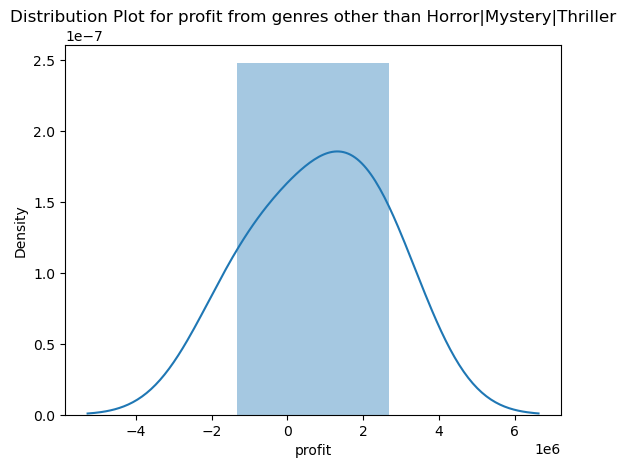

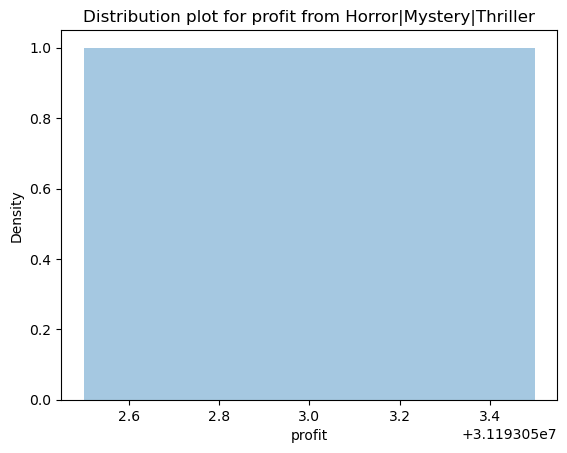

In [58]:
#part 3
import warnings
warnings.filterwarnings("ignore") 
sn.distplot(df_5['profit']) 
plt.title("Distribution Plot for profit from genres other than Horror|Mystery|Thriller")
plt.show()
sn.distplot(df_6['profit'])
plt.title("Distribution plot for profit from Horror|Mystery|Thriller")
plt.show()

From the above hypothesis testing I could propose  Horror|Mystery|Thriller and Crime|Drama genres at 99% confidence interval.

## Summary

At first I had removed the null values and duplicate data from the movie_metadata dataset. I also removed some unused columns which I am not using here.I also looked into the correlation matrix of all the features. 

Then I carried out exploratory data analysis to find out some movie genres with higher profit and imdb_score assuming a maximum budget and minimum imdb score. I had done some bar graph to compare the profit,budget,imdb_score. I also find out number of movies per year with profit to analyse which year movies made a good profit.

Finally, I carried out a hypothesis testing assuming three cases. I could propose Horror|Mystery|Thriller and Crime|Drama genres at 99% confidence interval.


In [60]:
# write the notebook filepath here
# make sure that the notebook is also in the same directory as this code
filepath="Notebook.ipynb"
import io
from nbformat import read
with io.open(filepath, "r", encoding="utf-8") as f:
    nb=read(f, 4)
word_count = 0
for cell in nb["cells"]:
    if cell.cell_type == "markdown":
        word_count += len(cell["source"].replace("#", "").lstrip().split(" "))
print(f"Submission length is {word_count}")

Submission length is 914
